In [516]:
import pickle

f = open('./test.pkl', 'rb')  
test = pickle.load(f) 
test

,ID,labels,PatientID,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,Position3,PositionOrd,LeftLabel,RightLabel,BitsStored,PixelRepresentation,brain_ratio,brain_diff
0,Test_001,,ID_9df0f9aa,35,135,-1024.0,1.0,37.500000,1.0,,,16,1,0.143860,80.0
1,Test_002,,ID_00859e11,40,150,-1024.0,1.0,76.016000,1.0,,,16,1,0.289101,80.0
2,Test_003,,ID_d28d9540,40,80,-1024.0,1.0,169.275374,1.0,,,12,0,0.102123,80.0
3,Test_004,,ID_78ce1b0d,30,80,-1024.0,1.0,216.173000,1.0,,,16,1,0.001240,80.0
4,Test_005,,ID_08faadaf,36,80,-1024.0,1.0,121.000000,1.0,,,12,0,0.309010,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Test_596,,ID_ac57e226,30,80,-1024.0,1.0,95.537000,0.5,,,16,1,0.278336,80.0
596,Test_597,,ID_4ecb1803,40,150,-1024.0,1.0,45.149000,1.0,,,16,1,0.198143,80.0
597,Test_598,,ID_b4d1c8f5,35,135,-1024.0,1.0,117.432632,1.0,,,16,1,0.183155,80.0
598,Test_599,,ID_991ad3c5,40,80,-1024.0,1.0,221.227522,1.0,,,12,0,0.330856,80.0


In [565]:
import numpy as np

f = open('/home/islab/kaggle-rsna-intracranial-hemorrhage/model/model100_total/fold0_ep3_test_tta5.pkl', 'rb')  
data = pickle.load(f) 

total = np.zeros([600,6])

for i in range(5):
    total += data[i]['outputs']

    
# f = open('/home/islab/kaggle-rsna-intracranial-hemorrhage/model/model110_total/fold0_ep3_test_tta5.pkl', 'rb')  
# data2 = pickle.load(f) 


# for i in range(5):
#     total += data2[i]['outputs']
    
    
total = total / 5

Heathly threshold: 90, Others: 510


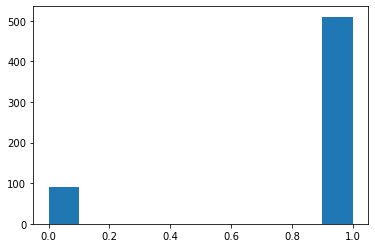

In [568]:
import matplotlib.pyplot as plt
%matplotlib inline
any_pos = total[:,0]
any_pos = np.where(any_pos > 0.5, 1, 0)
#any_pos = np.where(np.max(total[:,1:],axis=1) > 0.25, 1, 0)
print(f'Heathly threshold: {np.count_nonzero(any_pos==0)}, Others: {np.count_nonzero(any_pos==1)}')
_ = plt.hist(any_pos)

<AxesSubplot:>

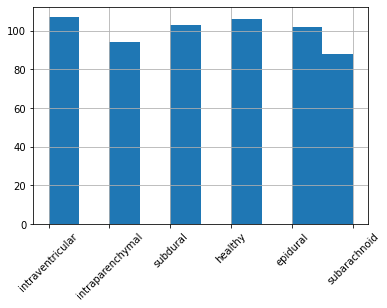

In [574]:
dic = {0:'epidural', 1:'subdural', 2:'subarachnoid', 3:'intraventricular', 4:'intraparenchymal'}
for i in range(600):
    if total[i][0] <= 0.6:
        test.at[i, 'labels'] = 'healthy'
    else:
        test.at[i, 'labels'] = dic[np.argmax(total[i][1:])]
        
test['labels'].hist(xrot=45)

In [575]:
output = test.iloc[:,:2]
output.to_excel("output2.xlsx", header=False, index=False) 

In [193]:
# import pandas as pd
# GT = pd.read_csv('testingdata_true.csv')
# for i in range(536):
#     GT['png'][i] = GT['png'][i][:-4]
    
# val = GT['png'].tolist()

# with open('val_label.pkl', 'wb') as f:
#     pickle.dump(val, f)

In [576]:
import pandas as pd
GT = pd.read_csv('testingdata_true.csv')
for i in range(536):
    GT['dcm'][i] = GT['dcm'][i][:-4]
GT = GT.drop(columns=['png'])
tmp = pd.merge(output,GT,left_on='ID', right_on='dcm')

In [577]:
tmp[tmp['labels']==tmp['label']].count()

ID        416
labels    416
dcm       416
label     416
dtype: int64

In [580]:
600-121

479

In [579]:
416/

0.6933333333333334

Heathly threshold: 84, Others: 516


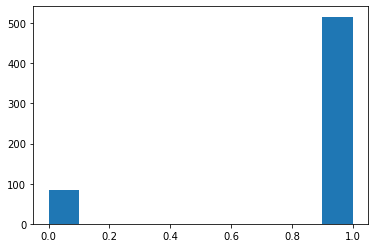

In [509]:
f = open('/home/islab/kaggle-rsna-intracranial-hemorrhage/meta/meta100_lgb.pkl', 'rb')  
data1 = pickle.load(f) 
f = open('/home/islab/kaggle-rsna-intracranial-hemorrhage/meta/meta100_xgb.pkl', 'rb')  
data2 = pickle.load(f) 
f = open('/home/islab/kaggle-rsna-intracranial-hemorrhage/meta/meta100_cat.pkl', 'rb')  
data3 = pickle.load(f) 

total = ((data1[0]['outputs'])+(data2[0]['outputs'])+(data3[0]['outputs']))/3

any_pos = np.where(total[:,0] > 0.4, 1, 0)
print(f'Heathly threshold: {np.count_nonzero(any_pos==0)}, Others: {np.count_nonzero(any_pos==1)}')
_ = plt.hist(any_pos)

dic = {0:'epidural', 1:'subdural', 2:'subarachnoid', 3:'intraventricular', 4:'intraparenchymal'}
for i in range(600):
    if total[i][0] <= 0.4:
        test.at[i, 'labels'] = 'healthy'
    else:
        test.at[i, 'labels'] = dic[np.argmax(total[i][1:])]

<AxesSubplot:>

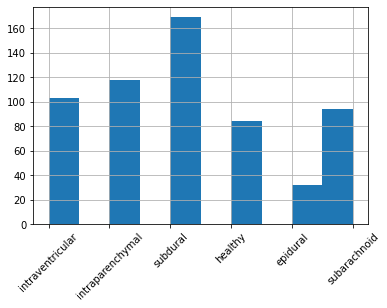

In [510]:
test['labels'].hist(xrot=45)

In [511]:
output = test.iloc[:,:2]
output.to_excel("output2.xlsx", header=False, index=False) 